# 🔵 **Processo Seletivo da Stepps**

*Vaga de Estágio em Visão Computacional*

In [196]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import random
import math
import matplotlib as plt
import seaborn as sns

## 🔷 PARTE 1

###🔹Primeiro Ponto

In [197]:
lista_inteiros = []         # Criando uma lista
for i in range(20):
  lista_inteiros.append(np.random.randint(1,100))     # Adicionando 20 números aleatórios à lista

print('A lista é formada pelos seguintes números aleatórios: {}'.format(lista_inteiros))
lista_inteiros.sort()
print('O maior número da lista é {}'.format(lista_inteiros[len(lista_inteiros)-1]))

A lista é formada pelos seguintes números aleatórios: [63, 7, 47, 20, 90, 90, 89, 26, 73, 20, 65, 65, 37, 78, 1, 91, 47, 83, 67, 54]
O maior número da lista é 91


###🔹Segundo Ponto

In [198]:
# É palíndromo?
def ehPalindromo(palavra):
  palavra = palavra.casefold() # Em nosso exemplo, optei por uma abordagem case-insensitive
  tam = len(palavra)//2
  for i in range(tam):
      if palavra[i] != palavra[len(palavra) - (1+i)]:
        return False
  return True

palavra = input("Digite uma palavra: ")
if ehPalindromo(palavra):
  print("A palavra {} é um palíndromo!".format(palavra))
else: print("A palavra {} não é um palíndromo!".format(palavra))


Digite uma palavra: aaNAA
A palavra aaNAA é um palíndromo!


###🔹 Terceiro Ponto

In [199]:
soma_impares = 0 
soma_total = 0

with open('numeros.csv', 'r') as arquivo_csv:
    linhas = arquivo_csv.readlines()
    for linha in linhas:
        numeros = linha.strip().split(',') 
        for numero_str in numeros:
            numero = int(numero_str) 
            if numero % 2 != 0: 
                soma_impares = numero + soma_impares
            soma_total = numero + soma_total


print("Soma dos números ímpares: {}".format(soma_impares))
print("Soma total dos números: {}".format(soma_total)) # Apenas para fins de comparação

Soma dos números ímpares: 595
Soma total dos números: 1083


## 🔷 PARTE 2

### 🔹 Preparação dos Dados

In [200]:
#Importando o dataset
data = pd.read_csv('Crash_Data.csv')
data.head(5)

<ipython-input-200-56f998965f71>:2: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Data.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [201]:
print("O tamanho do nosso dataset é: {}".format(data.shape))

O tamanho do nosso dataset é: (52843, 23)


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [203]:
data.isnull().sum() # We have a lot of values that are NaN/Null, what can we do with them? Are they necessary?

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [204]:
for col in data:
    print('{}:::{}'.format(col,data[col].unique()))

Crash ID:::[20212133 20214022 20212096 ... 19891246 19895088 19896063]
State:::['Vic' 'SA' 'Qld' 'WA' 'NSW' 'NT' 'ACT' 'Tas']
Month:::[ 9  8  7  6  5  4  3  2  1 12 11 10]
Year:::[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994
 1993 1992 1991 1990 1989]
Dayweek:::['Sunday' 'Saturday' 'Thursday' 'Wednesday' 'Friday' 'Tuesday' 'Monday']
Time:::['0:30' '23:31' '23:00' ... '3:42' '22:33' '6:57']
Crash Type:::['Single' 'Multiple']
Bus Involvement:::[nan 'No' 'Yes']
Heavy Rigid Truck Involvement:::[nan 'No' 'Yes']
Articulated Truck Involvement:::[nan 'No' 'Yes']
Speed Limit:::[nan '110' '100' '60' '80' '50' '70' '90' '40' '130' '20' '10' '30' '25'
 '15' '<40' '5' 'Unspecified' '75' 110 100 60 -9 80 90 70 40 50 30 20 75]
Road User:::['Motorcycle rider' 'Pedestrian' 'Passenger' 'Driver' 'Other/-9'
 'Pedal cyclist' 'Motorcycle pillion passenger']
Gender:::['Male' 'Female' nan 'Unspecified']
Age:::[ 38 

### 🔹 Primeiro Ponto

**Descrição do que é requerido:** Forneça a média de idade das pessoas que morreram em acidentes de
trânsito na Austrália no ano de 2021, em relação ao gênero (Gender)
masculino e feminino.

In [205]:
# O que precisamos para essa requisição? Nosso dataframe é vasto, logo, podemos recortá-los para melhorar a visualização e entendimento dos dados.
# A seguir, vamos selecionar algumas colunas
df = pd.DataFrame()
df = data.copy()

df = data[['Crash ID','Year','Gender','Age Group', 'Age']]
rowsNotDuplicated = df['Crash ID'].value_counts().sum()
if(rowsNotDuplicated == df.shape[0]):
  print('Não temos registros de acidentes duplicados!')
  df = df.drop(['Crash ID'], axis=1)

Não temos registros de acidentes duplicados!


In [206]:
df.head(2) # Temos, agora, um recorte bastante objetivo do nosso problema.

,Year,Gender,Age Group,Age
0,2021,Male,26_to_39,38
1,2021,Female,26_to_39,28


In [207]:
df_2021 = pd.DataFrame()
df_2021 = df[df["Year"] > 2020] # Apenas o ano de 2021 no nosso dataset
df_2021

,Year,Gender,Age Group,Age
0,2021,Male,26_to_39,38
1,2021,Female,26_to_39,28
2,2021,Male,17_to_25,19
3,2021,Male,17_to_25,23
4,2021,Male,40_to_64,46
...,...,...,...,...
838,2021,Male,26_to_39,31
839,2021,Male,40_to_64,49
840,2021,Female,75_or_older,75
841,2021,Female,65_to_74,68


In [208]:
# Com isso, podemos retirar também a coluna referente ao ano, pois ela se torna redundante.
df_2021_perGender = pd.DataFrame()
df_2021_perGender = df_2021.drop(['Year'], axis=1) # Apenas o ano de 2021 no nosso dataset
df_2021_perGender

,Gender,Age Group,Age
0,Male,26_to_39,38
1,Female,26_to_39,28
2,Male,17_to_25,19
3,Male,17_to_25,23
4,Male,40_to_64,46
...,...,...,...
838,Male,26_to_39,31
839,Male,40_to_64,49
840,Female,75_or_older,75
841,Female,65_to_74,68


In [209]:
df_2021_perGender.isnull().sum()

Gender       1
Age Group    2
Age          0
dtype: int64

In [210]:
df_2021_perGender.dropna(subset=['Gender','Age Group'])

,Gender,Age Group,Age
0,Male,26_to_39,38
1,Female,26_to_39,28
2,Male,17_to_25,19
3,Male,17_to_25,23
4,Male,40_to_64,46
...,...,...,...
838,Male,26_to_39,31
839,Male,40_to_64,49
840,Female,75_or_older,75
841,Female,65_to_74,68


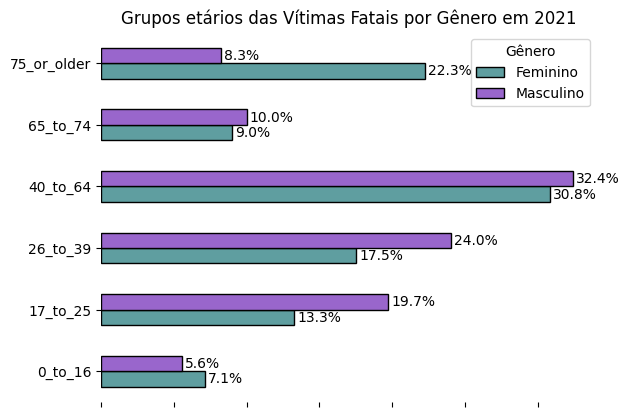

In [231]:
# Passamos agora para a parte de visualização dos nossos dados e construção dos nossos resultados.
# Podemos fazer a análise do ponto de vista das idades agrupadas e das idades exatas
import matplotlib.pyplot as plt
#Vamos entender, primeiro, o tamanho das nossas combinações de grupos existentes
df_sizeGrouped = df_2021_perGender.groupby(["Age Group", "Gender"]).size()
df_sizeGrouped = df_sizeGrouped.unstack()
df_percentage = df_sizeGrouped.div(df_sizeGrouped.sum(axis=0), axis=1) * 100

colors = ['#5F9EA0',  '#9966CC']

ax = df_percentage.plot(kind='barh', stacked=False, color=colors, edgecolor='black', linewidth=1)
ax.set_xticklabels([])
ax.set_ylabel("")

for i in ax.patches:
  width = i.get_width()
  plt.text(width + 0.2, i.get_y() + 0.5 * i.get_height(), f"{width:.1f}%", va='center')


# Remover as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Grupos etários das Vítimas Fatais por Gênero em 2021')
plt.legend(['Feminino', 'Masculino'], title='Gênero', loc='upper right')
plt.show()


In [215]:
# Calcular a idade média por gênero
df_mean_age = df_2021_perGender.groupby('Gender')['Age'].mean()

# Exibir a idade média por gênero
print(df_mean_age)

Gender
Female    49.753555
Male      42.736926
Name: Age, dtype: float64


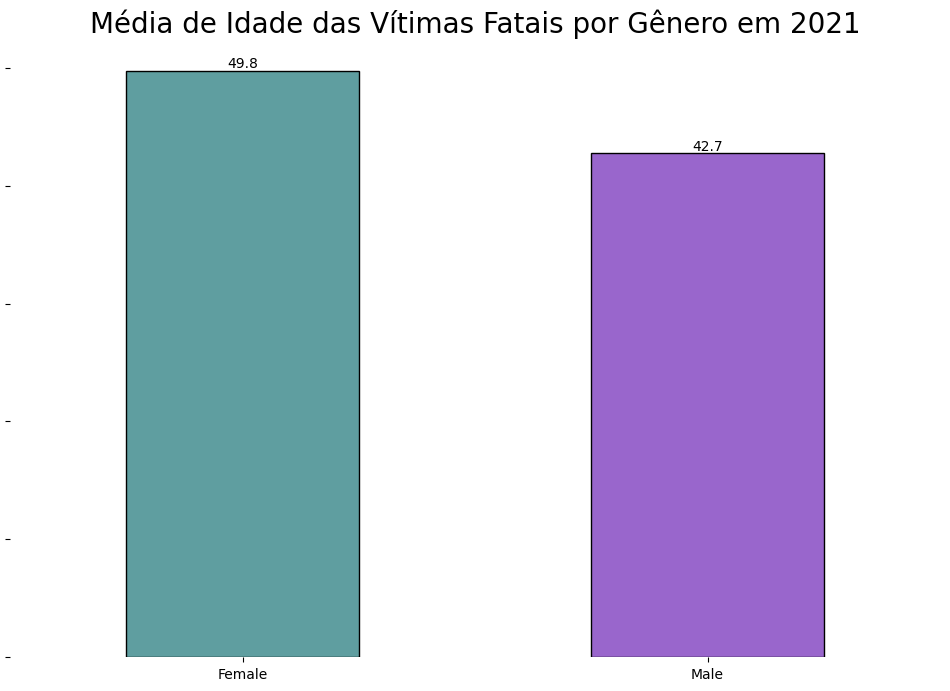

In [227]:
# Observando, agora, do ponto de vista das idades exatas, temos:
plt.figure(figsize=(12, 8))
colors = ['#5F9EA0',  '#9966CC']
ax = df_mean_age.plot(kind='bar', color=colors, edgecolor='black', linewidth=1)

plt.title('Média de Idade das Vítimas Fatais por Gênero em 2021', fontsize=20)

for i, v in enumerate(df_mean_age):
    plt.text(i, v, f"{v:.1f}", ha='center', va='bottom')

ax.set_xlabel("")
ax.set_yticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=0)

plt.show()

In [217]:
# Observando, agora, do ponto de vista das idades agrupadas, temos:
age_groups = df_2021_perGender['Age Group'].unique()
print(age_groups)
# O que observamos aqui é que, caso escolhessemos fazer um gráfico usando grupos etários teriamos algumas dificuldades em função da existência no 75_or_older, por exemplo.
# Com isso, podemos finalizar esse primeiro ponto requisitado.

['26_to_39' '17_to_25' '40_to_64' '0_to_16' '65_to_74' '75_or_older' nan]


### 🔹Segundo Ponto

**Descrição do que é requerido:** Faça uma análise da representatividade dos grupos de idade (Age Group) em relação ao tipo de acidente (Crash Type). Lembre-se de utilizar a linguagem de programação python.

In [218]:
df = pd.DataFrame()
df = data.copy()
df = df[['Crash Type', 'Age Group']]
df.head(2)

,Crash Type,Age Group
0,Single,26_to_39
1,Multiple,26_to_39


In [219]:
df.isnull().sum() 

Crash Type     0
Age Group     90
dtype: int64

In [220]:
df.dropna(subset=['Age Group'])

,Crash Type,Age Group
0,Single,26_to_39
1,Multiple,26_to_39
2,Single,17_to_25
3,Single,17_to_25
4,Single,40_to_64
...,...,...
52838,Single,0_to_16
52839,Single,17_to_25
52840,Single,17_to_25
52841,Single,17_to_25


<Figure size 1200x800 with 0 Axes>

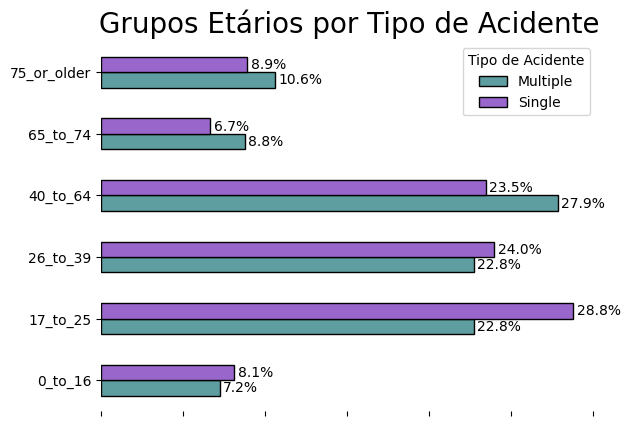

In [221]:
# Passamos agora para a parte de visualização dos nossos dados e construção dos nossos resultados.
#Vamos entender, primeiro, o tamanho das nossas combinações de grupos existentes
plt.figure(figsize=(12, 8))
df_sizeGrouped = df.groupby(["Age Group", "Crash Type"]).size()
df = df.rename(columns={'Crash Type': 'Tipo de Acidente'})
df_sizeGrouped = df_sizeGrouped.unstack()
df_percentage = df_sizeGrouped.div(df_sizeGrouped.sum(axis=0), axis=1) * 100

colors = ['#5F9EA0', '#9966CC']

ax = df_percentage.plot(kind='barh', stacked=False, color=colors, edgecolor='black', linewidth=1)
ax.set_xticklabels([])
for i in ax.patches:
    width = i.get_width()
    plt.text(width + 0.2, i.get_y() + 0.5 * i.get_height(), f"{width:.1f}%", va='center')

# Remover as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel("")
ax.legend(title='Tipo de Acidente')
plt.title('Grupos Etários por Tipo de Acidente', fontsize=20)
plt.show()

Entendemos, a partir do gráfico acima que pessoas pertencentes aos grupos etários 0 até 16, 17 até 25 e 26 até 39 têm mais chances de se tornarem vítimas fatais em detrimento de um único acidente do que pessoas cuja idade se enquadra em um dos restantes grupos etários - 40 até 64, 65 até 74, 75 ou mais.

O que pode sinalizar para uma maior prudência no trânsito em função da idade. No entanto, é preciso frisar que essa é apenas uma hipótese e que para uma comprovação ou refutação dessa hipótese é preciso analisar mais a fundo as reais causas desse comportamento. 